In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os
sys.path.insert(0,'../scripts/Images_generation/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_scale_radius, get_data, shift_gal, peak_detection, draw_images
import cosmos_params

/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [3]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Maximum number of galaxies on an image
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)

In [4]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [5]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift, do_peak_detection, center_brightest)

In [6]:
res[2]

{'redshift_0': 0.2687000036239624,
 'moment_sigma_0': 2.0876762866973877,
 'e1_0': 0.04139259457588196,
 'e2_0': 0.06008027493953705,
 'mag_0': 26.524446095723643,
 'redshift': 0.2687000036239624,
 'moment_sigma': 2.0876762866973877,
 'e1': 0.04139259457588196,
 'e2': 0.06008027493953705,
 'mag': 26.524446095723643,
 'closest_redshift': nan,
 'closest_moment_sigma': nan,
 'closest_e1': nan,
 'closest_e2': nan,
 'closest_mag': nan,
 'blendedness_total_lsst': nan,
 'blendedness_closest_lsst': nan,
 'blendedness_aperture_lsst': nan,
 'nb_blended_gal': 1,
 'mag_ir': -0.2639798985612467,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 50.23844553386179,
 'SNR_peak': 0.05332257663032313}

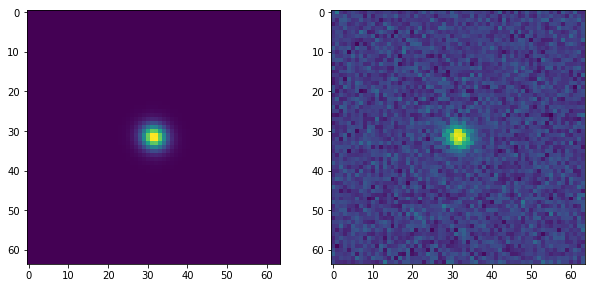

In [7]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [8]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Maximum number of galaxies on an image
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)

In [9]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift, do_peak_detection, center_brightest)

In [10]:
res[2]

{'redshift_0': 0.531499981880188,
 'moment_sigma_0': 1.8380582332611084,
 'e1_0': 0.11285270750522614,
 'e2_0': -0.519677460193634,
 'mag_0': 23.89798591216256,
 'redshift_1': 0.21070000529289246,
 'moment_sigma_1': 1.6457923650741577,
 'e1_1': -0.20112866163253784,
 'e2_1': 0.21576419472694397,
 'mag_1': 27.023793291289845,
 'redshift_2': 0.7430999875068665,
 'moment_sigma_2': 2.0793631076812744,
 'e1_2': 0.05666617676615715,
 'e2_2': 0.033361006528139114,
 'mag_2': 26.158427518645755,
 'redshift_3': 0.4000000059604645,
 'moment_sigma_3': 1.7447913885116577,
 'e1_3': -0.05405361205339432,
 'e2_3': -0.28132590651512146,
 'mag_3': 27.18373776731399,
 'redshift_4': 10.0,
 'moment_sigma_4': 10.0,
 'e1_4': 10.0,
 'e2_4': 10.0,
 'mag_4': 10.0,
 'redshift_5': 10.0,
 'moment_sigma_5': 10.0,
 'e1_5': 10.0,
 'e2_5': 10.0,
 'mag_5': 10.0,
 'redshift': 0.531499981880188,
 'moment_sigma': 1.8380582332611084,
 'e1': 0.11285273730754852,
 'e2': -0.5196775197982788,
 'mag': 23.89798591216256,
 'close

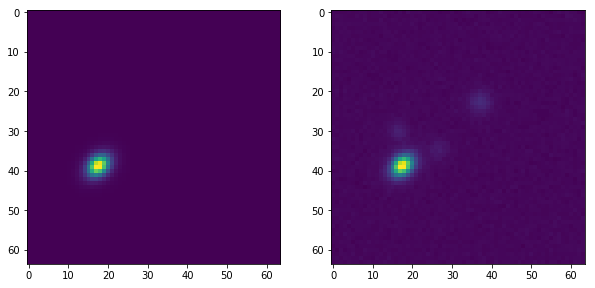

In [11]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation using real galaxy images

## Generate image of isolated galaxies

In [12]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Maximum number of galaxies on an image
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)

# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [13]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift, do_peak_detection, center_brightest)

In [14]:
res[2]

{'redshift': 2.532099962234497,
 'moment_sigma': 1.7338253259658813,
 'e1': 0.2732670307159424,
 'e2': 0.1068292036652565,
 'mag': 26.920893363007032,
 'closest_redshift': nan,
 'closest_moment_sigma': nan,
 'closest_e1': nan,
 'closest_e2': nan,
 'closest_mag': nan,
 'blendedness_total_lsst': nan,
 'blendedness_closest_lsst': nan,
 'blendedness_aperture_lsst': nan,
 'nb_blended_gal': 1,
 'mag_ir': -1.2144841518777265,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 42.47059358489572,
 'SNR_peak': 0.05180966709527075}

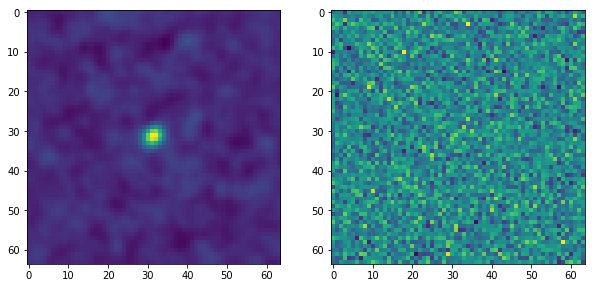

In [15]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [16]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Maximum number of galaxies on an image
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)

In [20]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift, do_peak_detection, center_brightest)

In [21]:
res[2]

{'redshift': 0.8600999712944031,
 'moment_sigma': 2.269580125808716,
 'e1': 0.14260461926460266,
 'e2': -0.11148663610219955,
 'mag': 26.76507972146775,
 'closest_redshift': 0.8310999870300293,
 'closest_moment_sigma': 2.34945011138916,
 'closest_e1': -0.021951444447040558,
 'closest_e2': -0.453025758266449,
 'closest_mag': 26.34847988146834,
 'blendedness_total_lsst': 0.09600871801376343,
 'blendedness_closest_lsst': 0.00546123,
 'blendedness_aperture_lsst': 0.9893234469292665,
 'nb_blended_gal': 6,
 'mag_ir': -1.6461650345690888,
 'closest_mag_ir': -1.4818772346628926,
 'closest_x': -1.6448369187011005,
 'closest_y': -0.4184811207835586,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 35.80269560453138,
 'SNR_peak': 0.03824416758909557}

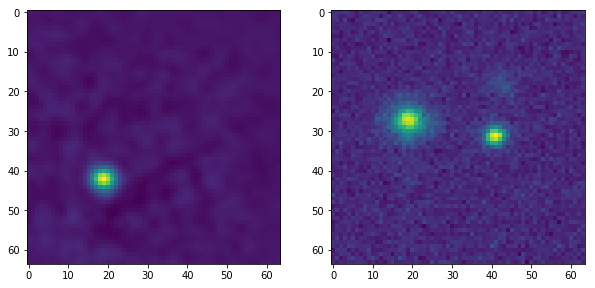

In [22]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])